# Additional Visualizations

<b>This notebook is used to work on visualizations while the other notebook will be modeling or performing lengthy GridSearches. 

This will be used to explore the 3 most important coefficients according to the models I ran...

    1) Tenure

    2) Contract

    3) Internet Service- Fiber Optic

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [134]:
def quick_bar(col):
    # quickly plot bar graphs that show total number of cases present in data set related to categorical columns
    # and the amount of those instances that churned in red
    df_col = df.groupby(col).sum()
    df_col1 = df.groupby(col).count()
    fig, ax = plt.subplots(figsize=(10,5))
    ax1 = sns.barplot(data = df_col1, x=df_col1.index, y='SeniorCitizen', color='lightblue',label='Total Cases')
    ax2 = sns.barplot(data=df_col, x=df_col.index, y='Churn', color='orange', label='Total Churned')
    plt.ylabel('Total Instances',size=15)
    plt.title(col, size=15)
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df=df.loc[df['TotalCharges'] != ' ']
df['TotalCharges']=df['TotalCharges'].astype('float')
df['SeniorCitizen']=df['SeniorCitizen'].astype('str')
df['SeniorCitizen']=df['SeniorCitizen'].replace({'0': 'No', '1':'Yes'})
df['Churn']=df['Churn'].replace({'No': '0', 'Yes':'1'}).astype('int')
df=df.drop(columns='customerID', axis=1)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [5]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical = ['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

<b>Created the below visualization for tenure to show that the rate of churn happens far more often in the early months of a customer's tenure than later. Used a histogram because it is the easiest way to visualize the dual distribution of churned and active customers

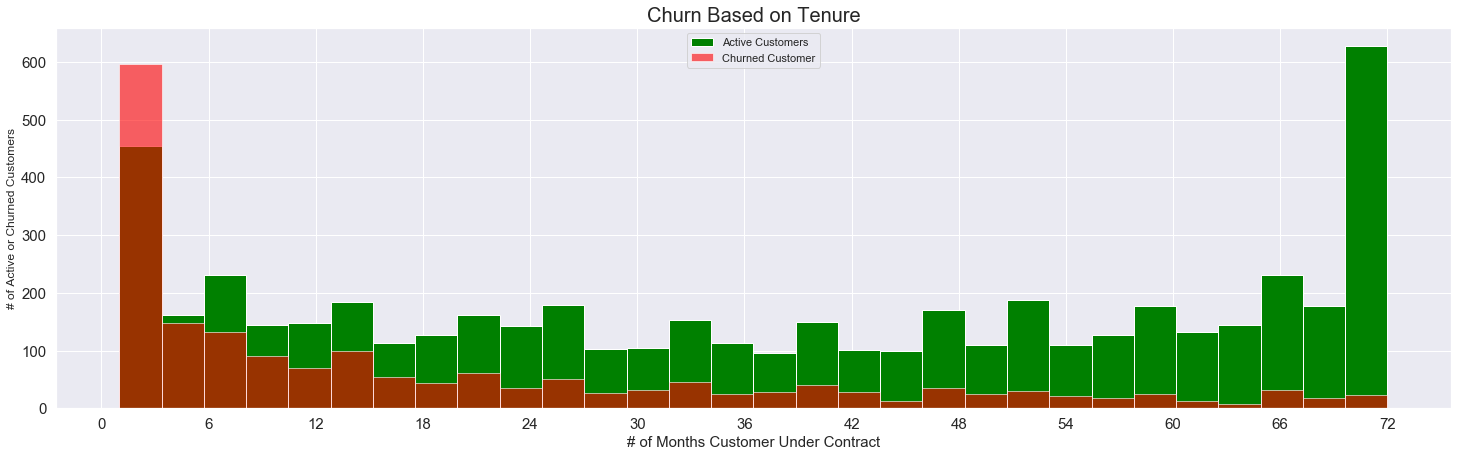

In [128]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set(style='darkgrid',palette='muted')
df[df.Churn == 0]['tenure'].hist(bins=30,color='green', alpha=1.0,label='Active Customers')
df[df.Churn == 1]['tenure'].hist(bins=30,color='red',alpha=.6, label='Churned Customer')
plt.title('Churn Based on Tenure',size=20)
plt.xlabel('# of Months Customer Under Contract',size=15)
plt.ylabel('# of Active or Churned Customers',size=12)
plt.xticks([0,6,12,18,24,30,36,42,48,54,60,66,72],size=15)
plt.yticks(size=15)
plt.legend()
plt.show()

<b> Created the below visualization to show the frequency of churn based on contract type. Instances of churn are far more prevalent in customers with month-to-month contracts

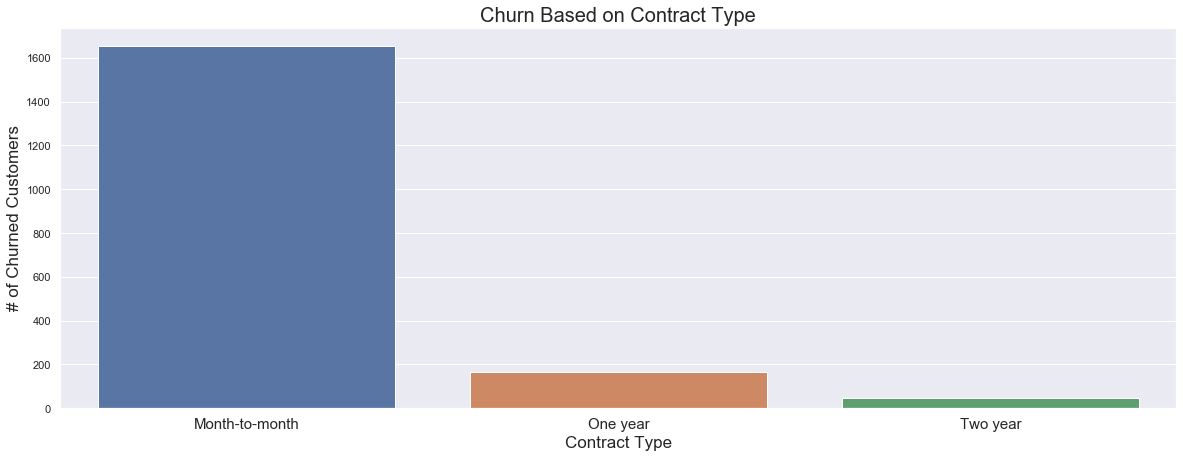

In [132]:
df_Contract=df.groupby('Contract').sum()
plt.figure(figsize=(20,7))
sns.set(style='darkgrid',palette='deep')
sns.barplot(data=df_Contract, x=df_Contract.index, y="Churn")
plt.title('Churn Based on Contract Type',size=20)
plt.xlabel('Contract Type',size=17)
plt.ylabel('# of Churned Customers',size=17)
plt.xticks(size=15)
plt.show()

<b>Below visualization was created to show the disparity in churned cases between the 3 types of contract categories

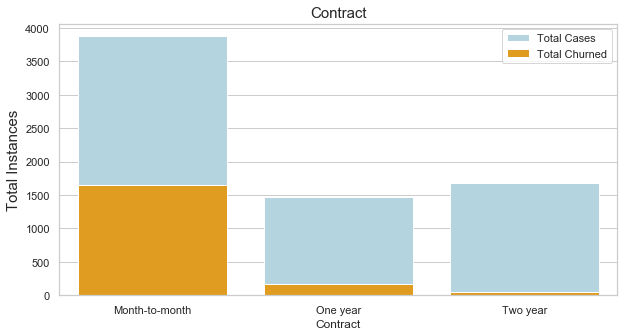

In [136]:
sns.set(style='whitegrid')
quick_bar('Contract')

<b>The below two visualizations are to show the difference in the churned cases based on the ISP Plan category and that customers are more likely to churn if they have the Fiber Optic plan 

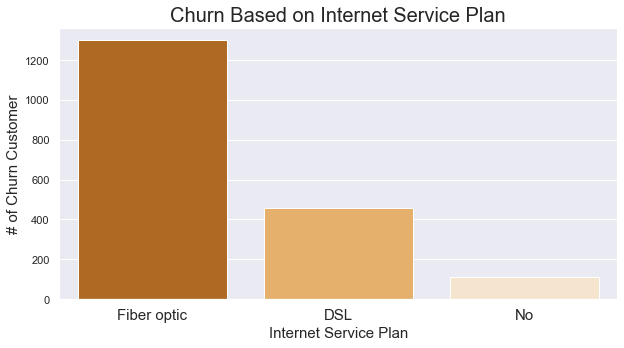

In [151]:
df_ISP=df.groupby('InternetService').sum().sort_values('Churn',ascending=False)
plt.figure(figsize=(10,5))
sns.set(style='darkgrid',palette='PuOr')
sns.barplot(data=df_ISP, x=df_ISP.index, y='Churn')
plt.title('Churn Based on Internet Service Plan', size=20)
plt.xlabel('Internet Service Plan', size=15)
plt.ylabel('# of Churn Customer',size=15)
plt.xticks(size=15)
plt.show()

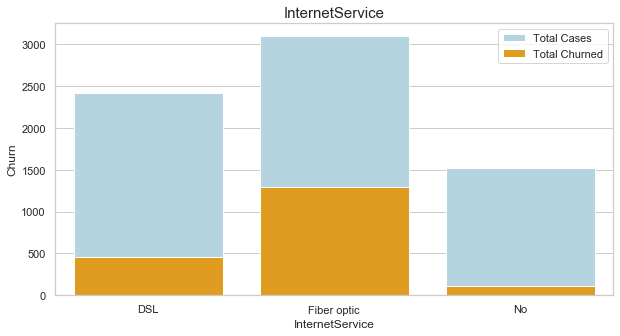

In [124]:
sns.set(style='whitegrid')
quick_bar('InternetService')

<b>Next visualization is me trying to investigate why the Fiber Optic plan is so indicative of churn. The below visualizations show that on average, the fiber optic plans are more expensive than the DSL plans

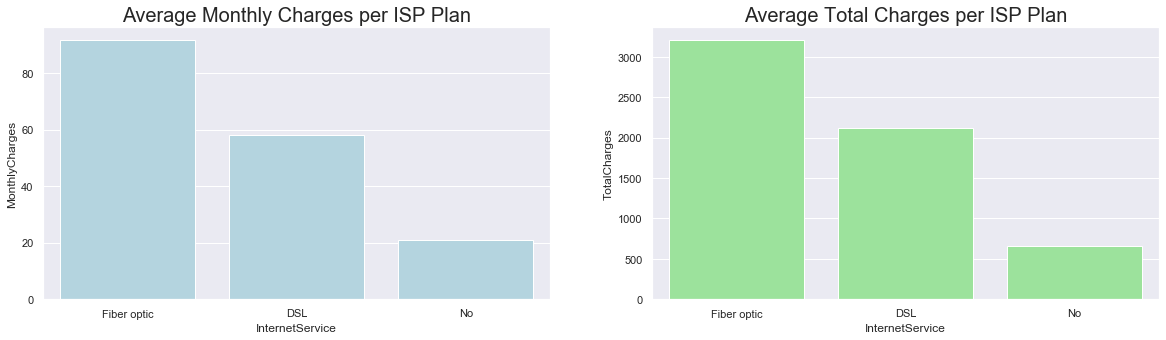

In [106]:
df_ISP2=df.groupby('InternetService').mean().sort_values('MonthlyCharges',ascending=False)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.set(style='darkgrid',palette='muted')
sns.barplot(data=df_ISP2,x=df_ISP.index,y='MonthlyCharges',color='lightblue')
plt.title('Average Monthly Charges per ISP Plan',size=20)
plt.subplot(1,2,2)
sns.barplot(data=df_ISP2,x=df_ISP.index,y='TotalCharges',color='lightgreen')
plt.title('Average Total Charges per ISP Plan',size=20)
plt.show()

<b>Below visualization shows that customers with Fiber Optic plans are also less likely to have a Tech Support plan, despite more people being on the Fiber Optic plan than the DSL plan

In [79]:
df['TechSupport'] = df['TechSupport'].replace({'No':0,'Yes':1,'No internet service':0})

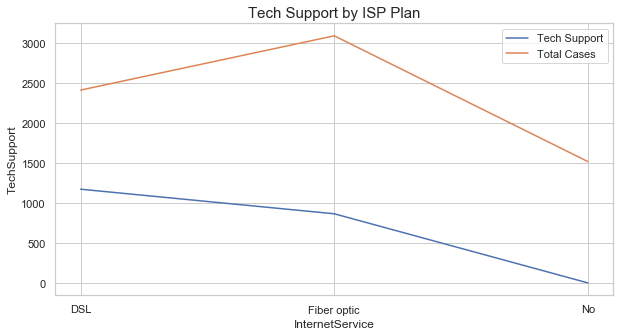

In [150]:
df_ISP3=df.groupby('InternetService').sum()
df_ISP6=df.groupby('InternetService').count()
plt.figure(figsize=(10,5))
sns.lineplot(data=df_ISP3, x=df_ISP3.index, y='TechSupport', label='Tech Support')
sns.lineplot(data=df_ISP6, x=df_ISP6.index, y='TechSupport', label='Total Cases')
plt.title('Tech Support by ISP Plan',size=15)
plt.show()

In [86]:
print(df['StreamingTV'].value_counts())
print(df['StreamingMovies'].value_counts())

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


In [89]:
df['StreamingTV']=df['StreamingTV'].replace({'No':0,'Yes':1,'No internet service':0})
df['StreamingMovies']=df['StreamingMovies'].replace({'No':0,'Yes':1,'No internet service':0})

In [91]:
df['StreamingContent'] = df['StreamingTV'] + df['StreamingMovies']
df['StreamingContent']=df['StreamingContent'].replace({2.0:1.0})

In [144]:
df['FiberOptic'] = df['InternetService']
df['DSL'] = df['InternetService']
df['FiberOptic']=df['FiberOptic'].replace({'Fiber optic':1,'No':0,'DSL':0})
df['DSL']=df['DSL'].replace({'Fiber optic':0,'No':0,'DSL':1})
df_ISP5=df.groupby('Contract').sum()
df_ISP5

,tenure,TechSupport,StreamingTV,StreamingMovies,MonthlyCharges,TotalCharges,Churn,StreamingContent,FiberOptic,DSL
Contract,,,,,,,,,,
Month-to-month,69892,671,1298,1304,257294.15,5305861.5,1655,1789.0,2128,1223
One year,61932,552,652,662,95796.90,4467053.5,166,824.0,539,570
Two year,96166,817,753,765,102569.95,6283253.7,48,882.0,429,623


<b>Below visualization is designed to show the distribution of contract types based on the Internet Service Plans: Fiber Optic and DSL

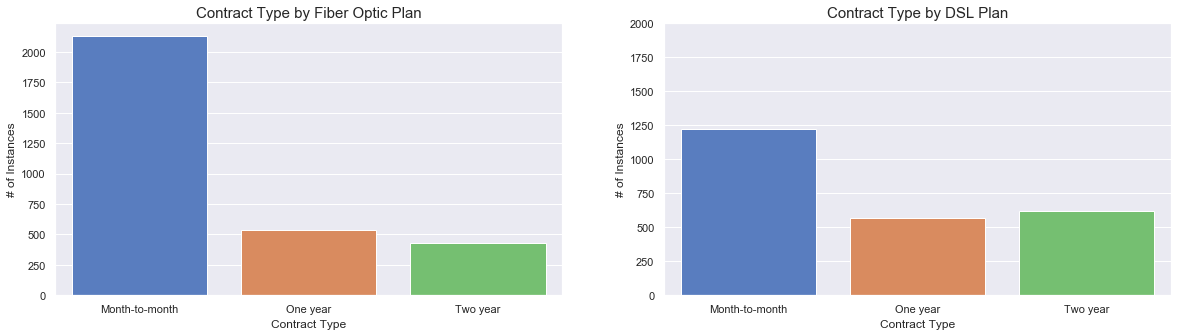

In [170]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.set(palette='muted')
sns.barplot(data=df_ISP5,x=df_ISP5.index, y='FiberOptic')
plt.title('Contract Type by Fiber Optic Plan',size=15)
plt.xlabel('Contract Type',size=12)
plt.ylabel('# of Instances',size=12)
plt.subplot(1,2,2)
sns.barplot(data=df_ISP5,x=df_ISP5.index, y='DSL')
plt.xlabel('Contract Type',size=12)
plt.ylabel('# of Instances',size=12)
plt.title('Contract Type by DSL Plan',size=15)
plt.yticks([0,250,500,750,1000,1250,1500,1750,2000])
plt.show()